# Linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('insurance.csv')
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Data Cleanup/Visualization

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.isnull().values.any() # check if any row is empty (NA)

False

In [6]:
df.loc[df.duplicated(keep=False),:] # check for duplicated rows # rows 195 and 581 are repeated

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df.shape # array dimension before dropping duplicate

(1338, 7)

In [8]:
df=df.drop_duplicates(keep='first') # drop the second duplicate,keep the first duplciate

In [9]:
df.shape # array dimension after dropping duplicate

(1337, 7)

In [10]:
print(df.sex.unique()) # get unique values in these 3 columns for mapping
print(df.smoker.unique())
print(df.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [11]:
cleanup_map={"sex":{"female":0,"male":1},
             "smoker":{"no":0,"yes":1},
             "region":{"southwest":1,"southeast":2,"northwest":3,"northeast":4}}
df.replace(cleanup_map,inplace=True)

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


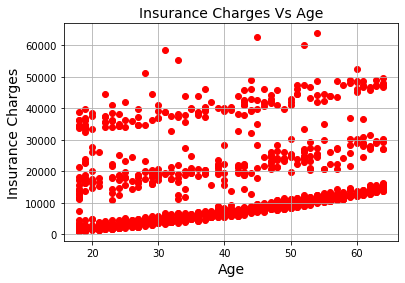

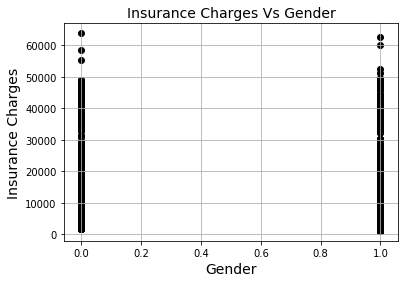

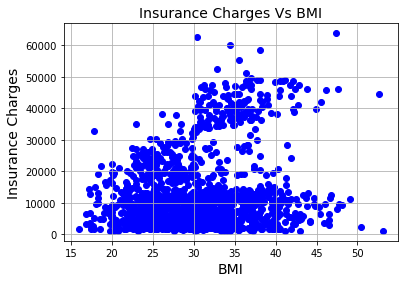

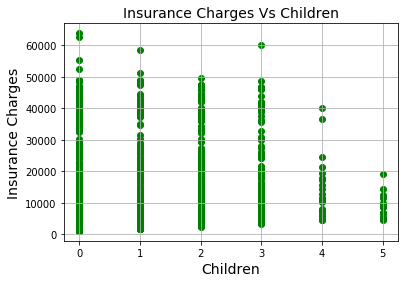

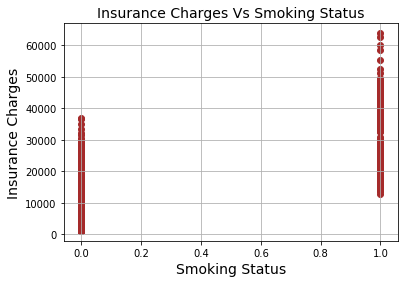

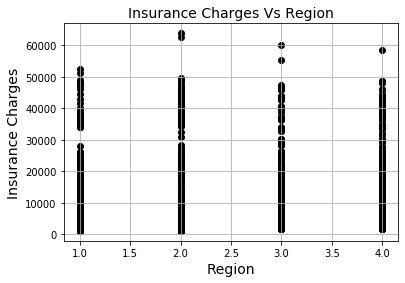

In [13]:
plt.scatter(df['age'], df['charges'], color='red')
plt.title('Insurance Charges Vs Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['sex'], df['charges'], color='black')
plt.title('Insurance Charges Vs Gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['bmi'], df['charges'], color='blue')
plt.title('Insurance Charges Vs BMI', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['children'], df['charges'], color='green')
plt.title('Insurance Charges Vs Children', fontsize=14)
plt.xlabel('Children', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['smoker'], df['charges'], color='brown')
plt.title('Insurance Charges Vs Smoking Status', fontsize=14)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['region'], df['charges'], color='black')
plt.title('Insurance Charges Vs Region', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.grid(True)
plt.show()

From scatter plots, age,number of children and smoking status have clear relationship with insurance charges. Perform multiple linear regression with these 3 variables.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [15]:
x=df[['age','children','smoker']]
y=df.charges

x_train,x_test,y_train, y_test = train_test_split(x, y, random_state=0)

print(x_train)
print()
print(x_test)
print()
print(y_train)
print()
print(y_test)

      age  children  smoker
1075   32         1       0
131    61         0       0
15     19         1       0
825    64         2       0
1137   26         0       0
...   ...       ...     ...
764    45         2       0
836    36         0       0
1217   29         2       0
559    19         0       0
685    53         2       0

[1002 rows x 3 columns]

      age  children  smoker
1248   18         0       0
610    47         1       0
393    49         1       0
503    19         0       1
198    51         0       0
...   ...       ...     ...
824    60         0       0
970    50         3       0
1327   51         1       0
793    53         0       1
635    64         0       0

[335 rows x 3 columns]

1075     4562.84210
131     13616.35860
15       1837.23700
825     16069.08475
1137     3176.28770
           ...     
764      9095.06825
836      4402.23300
1217     4058.11610
559      1646.42970
685     11244.37690
Name: charges, Length: 1002, dtype: float64

1248     163

In [16]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print("Coefficients: ",linreg.coef_)
print("Intercept: ",linreg.intercept_)

Coefficients:  [  257.94502948   473.70699605 23881.91018465]
Intercept:  -2369.8188254075594


In [18]:
y_hat = linreg.predict(x_test)
print(y_hat[0:6])
print(y_test[0:6])

[ 2273.19170526 10227.30455626 10743.19461523 26413.04691939
 10785.37767814  4336.75194111]
1248     1633.9618
610      8547.6913
393      9290.1395
503     32548.3405
198      9644.2525
821      2680.9493
Name: charges, dtype: float64


# Try linear regression with statsmodel instead.

In [19]:
import statsmodels.api as sm

In [20]:
x_train = sm.add_constant(x_train) # add a constant
model = sm.OLS(y_train, x_train).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     891.5
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          9.73e-282
Time:                        15:43:40   Log-Likelihood:                -10174.
No. Observations:                1002   AIC:                         2.036e+04
Df Residuals:                     998   BIC:                         2.037e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2369.8188    611.802     -3.874      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
x_test_sm = sm.add_constant(x_test)
y_hat_sm = model.predict(x_test_sm) 
print(y_hat_sm[0:6])

1248     2273.191705
610     10227.304556
393     10743.194615
503     26413.046919
198     10785.377678
821      4336.751941
dtype: float64


statsmodel gives the same regression model as sklearn.
From statsmodel summary, the adjusted R2 is 0.727 indicating the regression model is a good fit. The p-values for the coefficients, age, number of children and smoking status are less than 0.05; indicating the 3 regression coefficients are highly significant.

# Train a multiple regression model with all 6 features

In [22]:
x6=df[['age','sex','bmi','children','smoker','region']]
y6=df.charges

x6_train,x6_test,y6_train, y6_test = train_test_split(x6, y6, random_state=0)

print(x6_train)
print()
print(x6_test)
print()
print(y6_train)
print()
print(y6_test)

      age  sex     bmi  children  smoker  region
1075   32    0  29.590         1       0       2
131    61    0  22.040         0       0       4
15     19    1  24.600         1       0       1
825    64    0  31.825         2       0       4
1137   26    0  22.230         0       0       3
...   ...  ...     ...       ...     ...     ...
764    45    0  25.175         2       0       4
836    36    1  31.500         0       0       1
1217   29    1  37.290         2       0       2
559    19    1  35.530         0       0       3
685    53    1  26.410         2       0       4

[1002 rows x 6 columns]

      age  sex    bmi  children  smoker  region
1248   18    0  39.82         0       0       2
610    47    0  29.37         1       0       2
393    49    1  31.35         1       0       4
503    19    1  30.25         0       1       2
198    51    0  18.05         0       0       3
...   ...  ...    ...       ...     ...     ...
824    60    1  24.32         0       0       3
97

In [23]:
x6_train = sm.add_constant(x6_train) # add a constant
model6 = sm.OLS(y6_train, x6_train).fit()
print_model6 = model6.summary()
print(print_model6)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     502.2
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          6.38e-297
Time:                        15:43:40   Log-Likelihood:                -10128.
No. Observations:                1002   AIC:                         2.027e+04
Df Residuals:                     995   BIC:                         2.030e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.221e+04   1226.094     -9.959      0.0

In [24]:
x6_test_sm = sm.add_constant(x6_test)
y6_hat_sm = model6.predict(x6_test_sm) 
print(y6_hat_sm[0:6])
print(y6_test[0:6])

1248     5067.186985
610      9472.117810
393     11392.827113
503     26359.093584
198      6934.677559
821       735.729391
dtype: float64
1248     1633.9618
610      8547.6913
393      9290.1395
503     32548.3405
198      9644.2525
821      2680.9493
Name: charges, dtype: float64


Building the regression model with all 6 features, the adjusted R2 is improved only marginally from 0.727 from 0.750. It can be seen that sex is not a significant predictor of insurance premium with p value more than 0.05. The other 5 coefficients are significant with p-values less than 0.05. As a whole, the model is significant with prob (F-statistic) being extremely small (p-value (F-stat) << 0.001). As p-value (F-stat) decreases from 9.73e-282 to 6.38e-297 with the addition of features, we can conclude that the model with 6 features is an improvement compared to the previous model with 3 features.

# Building a model with 5 features: age,bmi,children,smoker,region

In [25]:
x5=df[['age','bmi','children','smoker','region']]
y5=df.charges

x5_train,x5_test,y5_train, y5_test = train_test_split(x5, y5, random_state=0)

print(x5_train)
print()
print(x5_test)
print()
print(y5_train)
print()
print(y5_test)

      age     bmi  children  smoker  region
1075   32  29.590         1       0       2
131    61  22.040         0       0       4
15     19  24.600         1       0       1
825    64  31.825         2       0       4
1137   26  22.230         0       0       3
...   ...     ...       ...     ...     ...
764    45  25.175         2       0       4
836    36  31.500         0       0       1
1217   29  37.290         2       0       2
559    19  35.530         0       0       3
685    53  26.410         2       0       4

[1002 rows x 5 columns]

      age    bmi  children  smoker  region
1248   18  39.82         0       0       2
610    47  29.37         1       0       2
393    49  31.35         1       0       4
503    19  30.25         0       1       2
198    51  18.05         0       0       3
...   ...    ...       ...     ...     ...
824    60  24.32         0       0       3
970    50  28.16         3       0       2
1327   51  30.03         1       0       2
793    53  20.90

In [26]:
x5_train = sm.add_constant(x5_train)# add a constant

#start time of fitting
start_time=time.time()
model5 = sm.OLS(y5_train, x5_train).fit()

#end time of fitting
elapsed_time=time.time()-start_time

print("Time taken to train model: ",elapsed_time," sec")
print()
print_model5 = model5.summary()
print(print_model5)

Time taken to train model:  0.0009968280792236328  sec

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     603.2
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          2.48e-298
Time:                        15:43:41   Log-Likelihood:                -10128.
No. Observations:                1002   AIC:                         2.027e+04
Df Residuals:                     996   BIC:                         2.030e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [27]:
x5_test_sm = sm.add_constant(x5_test)
y5_hat_sm = model5.predict(x5_test_sm) 
print(y5_hat_sm[0:6])
print(y5_test[0:6])

1248     5081.076600
610      9484.658750
393     11378.959341
503     26346.961395
198      6946.150439
821       720.745427
dtype: float64
1248     1633.9618
610      8547.6913
393      9290.1395
503     32548.3405
198      9644.2525
821      2680.9493
Name: charges, dtype: float64


Building the regression model with 5 features while removing gender, the adjusted R2 is improved very slightly from 0.750 from 0.751. All the 5 coefficients are significant with p-values less than 0.05. As a whole, the model is significant with prob (F-statistic) being extremely small (p-value (F-stat) << 0.001). As p-value (F-stat) decreases even further from 6.38e-297 to  2.48e-298 with the removal of gender, we can conclude that the model with 5 features is the most appropriate given the dataset.

In conclusion, 5 attributes (age, BMI, number of children, smoking habit and region) influence insurance claim amounts significantly. All 5 attributes have positive correlations with insurance claim amounts as seen by their positive regression coefficients. 

As expected,people who are aging and with higher BMI are submit higher insurance claims as additional health risks are associated with them. People with a high BMI can suffer from, or develop, diseases including diabetes, sleep apnea, and heart and joint problems while aging people people have greater diagnosed and undiagnosed health conditions than younger people, and are more likely to develop health problems. 

People with more children (dependents) are also filing for higher insurance claims as they require greater coverage. Smoking increases the quantum of insurance claims the most significantly as can be seen by it's large coefficient (2.392e+04). Some studies have reported that former tobacco users will always have a higher risk of cancer and other ailments, even if they never use tobacco again. 

People who live in the same area tend to have similar risk profiles. For example, unfriendly climate, a cultural aversion to exercise, or a lack of healthy food options in an area tend drive up insurance claims.
(Source: https://www.moneycrashers.com/factors-health-insurance-premium-costs/)

Surprisingly, gender does not significantly affect insurance claims. This may be attributed to the fact that the dataset only covers insurance claims filed by people up to age 64. People after the age of 65, especially women,tend to require greater help with daily need (Source: https://www.forbes.com/sites/nextavenue/2017/01/10/7-ways-women-can-cut-the-cost-of-long-term-care-insurance/#76b10c925ebb). Hence, the dataset does not capture these future claims.



In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse=mean_squared_error(y5_test, y5_hat_sm)
mse

40857189.91237021

In [33]:
rms = sqrt(mean_squared_error(y5_test, y5_hat_sm))
rms

6391.962915440781